In [145]:
import numpy as np
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.models import Model
from keras.layers import GlobalAveragePooling2D,MaxPooling2D
from keras.layers import Dense,Flatten,SpatialDropout2D
from keras.layers.merge import concatenate

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import History
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
%matplotlib inline

In [146]:
image_size = (64, 64)

In [147]:
def plot_model_history(history):
    """
    Function to plot training and validation data of model
    
    Parameters
    ----------
    history: dictionary
             history of training and validation of model
    Returns
    -------
    None
    
    """
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [148]:
def buildNet(num_classes):
    """
    Function to build 4 layer NN with 2 Conv layers, 1 MaxPool layer,
    1 GlobalMaxPool layer and 2 Dense layers
    
    Parameters
    ----------
    num_classes: int
                 Number of classes in training data
    Returns
    -------
    Neural Network created
    """
    model1=Sequential()
    model1.add(Convolution2D(32, (3,3),input_shape=(image_size[0], image_size[1], 3),activation='relu'))
    model1.add(MaxPooling2D(pool_size=(2,2)))
    model1.add(Convolution2D(64,(3,3),activation='relu'))
    model1.add(GlobalAveragePooling2D())

    model1.add(Dense(128, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model1.summary())
    return model1

In [149]:
#def trainNet(X_train,y_train,X_val,y_val):
def trainNet(training_set, validation_set):
    """
    Function to train NN created
    
    Arguments
    ---------
    X_train: numpy array
             training samples
    y_train: numpy array
             labels of training samples
    
    X_val: numpy array
             validation samples
    y_val: numpy array
             labels of validation samples
    
    Returns
    -------
    history: dictionary
             history of training and validation of model
    """
    num_classes = 1#y_train.shape[1]
    model = buildNet(num_classes)
    history = History()
    callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),history]
    
    history = model.fit_generator(training_set,
                                steps_per_epoch = 8000/32,
                                epochs = 15,
                                validation_data = validation_set,
                                validation_steps = 64,
                                use_multiprocessing = True,
                                workers = 8)
    model.save('model.hd5')
    plot_model_history(history)

    #model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=100,callbacks=callbacks,verbose=1)
    return history

In [150]:
def testNet(validation):
    """
    Function to load and test the model and print confusion matrix
    
    Parameters
    ----------
    X_test: numpy array
            testing samples
    y_test: numpy array
            labels of testing samples
    Returns
    -------
    pred: list
          prediction made by model
    """
    model = load_model('model.h5')
    pred=model.predict_generator(validation)
    pred=np.argmax(np.round(pred),axis=1)
    actual=np.argmax(np.round(y_test),axis=1)
    conf_matrix=confusion_matrix(actual, pred)
    print(conf_matrix)

In [151]:
if __name__=="__main__":
    """
    1.Add code to shuffle data and preprocess image data
    2.Split data into train,test sets
    3.Uncomment the code below 
    """
    #hist=trainNet(X_train,y_train,X_val,y_val)
    #plot_model_history(hist)
    #testNet(X_val,y_val)
    

In [152]:
from keras.preprocessing.image import ImageDataGenerator

In [153]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('dataset/train/',
                                                 target_size = image_size,
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = test_datagen.flow_from_directory('dataset/test/',
                                                  target_size = image_size,
                                                  batch_size = 32,
                                                  class_mode = 'binary', shuffle=False)


Found 1623 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
global_average_pooling2d_6 ( (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 27,841
Trainable params: 27,841
Non-trainable params: 0
_________________________________________________________________
None
E

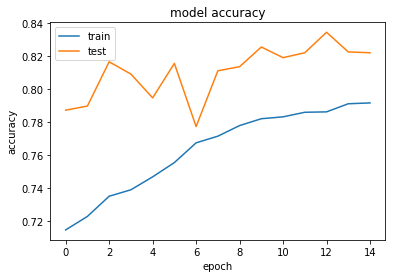

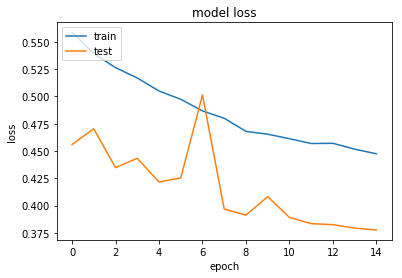

In [154]:
history = trainNet(training_set=training_set, validation_set=validation_set)

In [ ]:
mod = buildNet(1)

In [ ]:
from keras.models import load_model
mod=load_model('model.hd5')

In [ ]:
test_gen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory('final/',
                                                  target_size = image_size,
                                                  batch_size = 32,
                                                  class_mode = 'binary', shuffle=False)

In [ ]:
mod.predict_generator(test_data)